In [1]:
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
df = pd.read_csv('data/2020/english_premier_league.csv')

In [3]:
df

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Arsenal FC,Thomas,27,Defensive Midfield,Atlético Madrid,£45.00m,in,Summer,45.00,Premier League,2020,2020/2021
1,Arsenal FC,Gabriel,22,Centre-Back,LOSC Lille,£23.40m,in,Summer,23.40,Premier League,2020,2020/2021
2,Arsenal FC,Pablo Marí,26,Centre-Back,Flamengo,£7.20m,in,Summer,7.20,Premier League,2020,2020/2021
3,Arsenal FC,Rúnar Alex Rúnarsson,25,Goalkeeper,Dijon,£1.80m,in,Summer,1.80,Premier League,2020,2020/2021
4,Arsenal FC,Cédric Soares,28,Right-Back,Southampton,Free transfer,in,Summer,0.00,Premier League,2020,2020/2021
...,...,...,...,...,...,...,...,...,...,...,...,...
560,West Ham United,Josh Cullen,24,Central Midfield,RSC Anderlecht,£450Th.,out,Winter,0.45,Premier League,2020,2020/2021
561,West Ham United,Felipe Anderson,27,Left Winger,FC Porto,Loan,out,Winter,0.00,Premier League,2020,2020/2021
562,West Ham United,Jack Wilshere,28,Central Midfield,Without Club,-,out,Winter,0.00,Premier League,2020,2020/2021
563,Wolverhampton Wanderers,Rayan Aït Nouri,19,Left-Back,SCO Angers,Loan,in,Winter,0.00,Premier League,2020,2020/2021


In [8]:
clubs = set(list(df['club_name'].unique()) + list(df['club_involved_name'].unique()))

In [9]:
clubs

{'1.FSV Mainz 05',
 'AC Milan',
 'ADO Den Haag',
 'AS Roma',
 'Aberdeen FC',
 'Accrington',
 'Ajax',
 'Alavés',
 'Amiens SC',
 'Arsenal',
 'Arsenal FC',
 'Arsenal U23',
 'Aston Villa',
 'Atalanta',
 'Atlético Madrid',
 'Atlético-MG',
 'Bay. Leverkusen',
 'Bayern Munich',
 'Beerschot V.A.',
 'Benfica',
 'Besiktas',
 'Birmingham',
 'Blackburn',
 'Blackpool',
 'Bournemouth',
 'Brentford',
 'Brighton',
 'Brighton & Hove Albion',
 'Brighton U23',
 'Brisbane Roar',
 'Bristol City',
 'Burnley',
 'Burnley FC',
 'Burnley U23',
 'CA Talleres',
 'CD Leganés',
 'Cardiff',
 'Carlisle United',
 'Celtic',
 'Charlton',
 'Chelsea',
 'Chelsea FC',
 'Chelsea U23',
 'Club Brugge',
 'Coritiba FC',
 'Cosenza',
 'Coventry',
 'Crystal Palace',
 'Cukaricki',
 'Derby',
 'Dijon',
 'Dinamo Bucarest',
 'Dynamo Kyiv',
 'E. Frankfurt',
 'Elche CF',
 'Estudiantes',
 'Everton',
 'Everton FC',
 'Everton U23',
 'F. Düsseldorf',
 'FC Augsburg',
 'FC Barcelona',
 'FC Groningen',
 'FC Lorient',
 'FC Porto',
 'FC Schalke 04

NodeView(('Arsenal FC', 'Dynamo Kyiv', 'CA Talleres', 'Atlético Madrid', 'Heerenveen', 'SC Freiburg', 'Kilmarnock FC', 'West Bromwich Albion', 'Aston Villa', 'Cukaricki', 'Bay. Leverkusen', 'Real Betis', 'Accrington', 'Granada CF', 'RSC Anderlecht', 'Heracles Almelo', 'Kayserispor', 'Fulham FC', 'Hertha BSC', 'Liverpool U23', 'E. Frankfurt', 'Huddersfield', 'West Ham', 'Hull City', 'Swansea', 'Benfica', 'ADO Den Haag', 'Nottm Forest', 'AS Roma', 'KV Mechelen', 'Portimonense', 'Middlesbrough', 'Southampton FC', 'SSC Napoli', 'Sheff Utd', 'Blackpool', 'Estudiantes', 'Walsall', 'Manchester City', 'Wolverhampton Wanderers', 'Royal Antwerp', 'Lincoln City', 'Ajax', 'Everton FC', 'Juventus U19', 'SD Eibar', 'Aberdeen FC', 'Spurs', 'Bristol City', 'Zenit S-Pb', 'UD Logroñés', 'QPR', 'Saint-Étienne', 'LOSC Lille', 'Galatasaray', 'Legia Warszawa', 'Wigan', 'Chelsea U23', 'OGC Nice', 'Everton U23', 'Jagiellonia', 'Newcastle United', 'Watford', 'Swindon Town', 'FC Utrecht', 'Club Brugge', 'Stoke 

In [20]:
G = nx.DiGraph()
G.add_nodes_from(clubs)
G.nodes
for idx, row in df.iterrows():
    if row['transfer_movement'] == 'in':
        G.add_edge(row['club_involved_name'], row['club_name'])
    elif row['transfer_movement'] == 'out':
        G.add_edge(row['club_name'], row['club_involved_name'])

G.edges

OutEdgeView([('Arsenal FC', 'Aston Villa'), ('Arsenal FC', 'Hertha BSC'), ('Arsenal FC', 'VfB Stuttgart'), ('Arsenal FC', 'AS Roma'), ('Arsenal FC', 'Atlético Madrid'), ('Arsenal FC', 'Shrewsbury'), ('Arsenal FC', 'Flamengo'), ('Arsenal FC', 'Southampton'), ('CA Talleres', 'Manchester City'), ('Atlético Madrid', 'Arsenal FC'), ('Atlético Madrid', 'Chelsea FC'), ('SC Freiburg', 'Leeds United'), ('Kilmarnock FC', 'Sheffield United'), ('West Bromwich Albion', 'Sheff Utd'), ('West Bromwich Albion', 'Birmingham'), ('West Bromwich Albion', 'Crystal Palace'), ('West Bromwich Albion', 'Bristol City'), ('West Bromwich Albion', 'Lincoln City'), ('West Bromwich Albion', 'Chelsea U23'), ('West Bromwich Albion', 'Sporting CP'), ('West Bromwich Albion', 'Retired'), ('West Bromwich Albion', 'Benfica'), ('West Bromwich Albion', 'West Ham'), ('Aston Villa', 'Pafos FC'), ('Aston Villa', 'Wolves'), ('Aston Villa', 'Alavés'), ('Aston Villa', 'Stoke City'), ('Aston Villa', 'CD Leganés'), ('Aston Villa', 'L

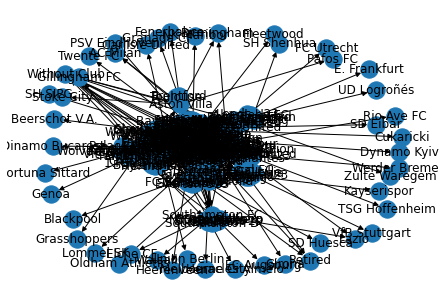

In [21]:
nx.draw(G, with_labels=True, layout=nx.spring_layout(G))

In [32]:
from webweb import Web
w = Web(nx_G=G)
w.show()

In [30]:
len(G.edges)

449